In [1]:
from eda_imports import *

seaborn not found


In [2]:
import kleat.misc.settings as S
import kleat.misc.utils as U

In [3]:
import pysam
import matplotlib.patches as patches
from matplotlib.collections import PatchCollection

In [4]:
DATA_DIR='/projects/btl/zxue/tasrkleat-TCGA-results/tasrkleat-TCGA-analysis-scripts/benchmark-kleat.bk/UHR/C1/tasrkleat-results'
c2g_bam = pysam.AlignmentFile(os.path.join(DATA_DIR, 'align_contigs2genome/cba.sorted.bam'))
r2c_bam = pysam.AlignmentFile(os.path.join(DATA_DIR, 'align_reads2contigs/cba.sorted.bam'))

In [6]:
seqname = 'chr12'
contig_name = 'A1.J26218'

In [7]:
# for contig in c2g_bam.fetch(contig=seqname):
for contig in c2g_bam:
    if contig.query_name == contig_name:
#         if contig.reference_name == 'chr1':
#             print(contig.cigarstring)
#             break
#         if contig.reference_name == 'chr12':
#             print(contig.cigarstring)
        break

In [8]:
reads = r2c_bam.fetch(contig.query_name)

In [9]:
cigar_events_color_dd = {
    S.BAM_CMATCH: 'green',      # 0
    S.BAM_CSOFT_CLIP: 'red',    # 4
    S.BAM_CHARD_CLIP: 'orange', # 5
    S.BAM_CDEL: 'blue',         # 2
    S.BAM_CINS: 'cyan',         # 1
    S.BAM_CREF_SKIP: 'black',   # 3
}

cigar_events_height_dd = {
    S.BAM_CMATCH: 0.02,       # 0
    S.BAM_CSOFT_CLIP: 0.04,   # 4
    S.BAM_CHARD_CLIP: 0.04,   # 5
    S.BAM_CDEL: 0.08,         # 2
    S.BAM_CINS: 0.08,         # 1
#     S.BAM_CREF_SKIP: 'black',
}

(0, 0.4)

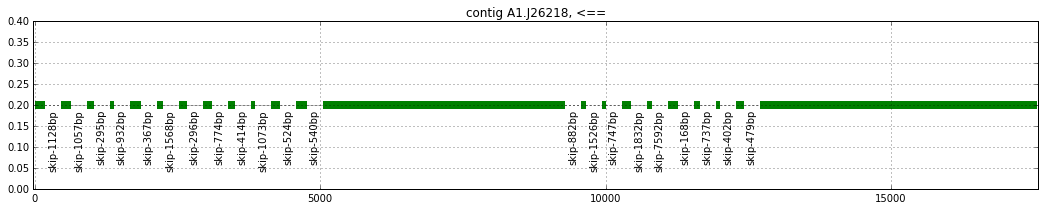

In [15]:
fig = plt.figure(figsize=(18, 3))
ax = fig.add_subplot(111)

cx = 0   # current x  
cy = 0.2 # current y, the center of a patch, not the bottom
contig_height = read_height = 0.05
# hdelta = 0
# vdelta = 0.01

# plot the contig aligned to the genome
total_span = contig.reference_end - contig.reference_start
for k, (key, raw_span) in enumerate(contig.cigartuples):
#     print((key, raw_span))
    if key == S.BAM_CREF_SKIP:
        span = total_span * 0.008   # arbitraily set to one tens
    else:
        span = raw_span

    if key in [S.BAM_CMATCH, S.BAM_CSOFT_CLIP, S.BAM_CHARD_CLIP]:
        width = span
        height = cigar_events_height_dd[key]
        x = cx
        y = cy - height * 0.5
        fc = cigar_events_color_dd[key]
        patch = patches.Rectangle((x, y), width, height, facecolor=fc, edgecolor='none')
        ax.add_patch(patch)
        
        pat_x = x + patch.get_width() / 2.0
        pat_y = y + patch.get_height()/2.0
        
        if key == S.BAM_CHARD_CLIP:
            txt = 'HC'
        elif key == S.BAM_CSOFT_CLIP:
            txt = 'SC'
        elif key == S.BAM_CMATCH:
            txt = ''
        else:
            raise
        ax.annotate(txt, (pat_x, pat_y), color='w', weight='bold', fontsize=10, ha='center', va='center')
        cx += span
    elif key in [S.BAM_CREF_SKIP, S.BAM_CDEL]:
        xs = [cx, cx + span]
        ys = [cy, cy]
        color = cigar_events_color_dd[key]
        ax.plot(xs, ys, ':', color=color)
        
        if key == S.BAM_CREF_SKIP:
            txt = f'skip-{raw_span}bp'
        elif key == S.BAM_CDEL:
            txt = f'del-{raw_span}bp'
        ax.text(cx + span * 0.5, cy - 0.01, txt, va='top', ha='center', rotation=90)
        cx += span
    elif key in [S.BAM_CINS]:
        pat = patches.Polygon([[cx, cy], [cx-span/2, cy + 0.1], [cx + span/2, cy + 0.1]],
                                facecolor='black', edgecolor='grey')
        print(pat)
        ax.add_patch(pat)
        ax.text(cx + span * 0.5, cy + 0.03, f'In-{span}bp', va='bottom', ha='center', rotation=45)
    else:
        raise ValueError(f'TODO implement handle {key}')

# plot the reads aligned
for read in r2c_bam.fetch(contig=contig.query_name):
    break


strand = '<==' if contig.is_reverse else '==>'
ax.set_title(f'contig {contig.query_name}, {strand}')
ax.grid(lw=0.5)

ax.set_xlim(0 - 20, cx + 20)
ax.set_ylim(0, 0.4)

Poly((1465.52, 0.2) ...)


(0, 0.4)

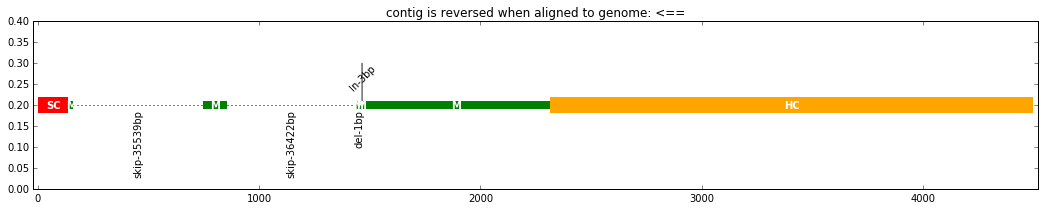

In [138]:
fig = plt.figure(figsize=(18, 3))
ax = fig.add_subplot(111)

cx = 0   # current x  
cy = 0.2 # current y, the center of a patch, not the bottom
contig_height = read_height = 0.05
# hdelta = 0
# vdelta = 0.01

# plot the contig aligned to the genome
total_span = contig.reference_end - contig.reference_start
for k, (key, raw_span) in enumerate(contig.cigartuples):
#     print((key, raw_span))
    if key == S.BAM_CREF_SKIP:
        span = total_span * 0.008   # arbitraily set to one tens
    else:
        span = raw_span

    if key in [S.BAM_CMATCH, S.BAM_CSOFT_CLIP, S.BAM_CHARD_CLIP]:
        width = span
        height = cigar_events_height_dd[key]
        x = cx
        y = cy - height * 0.5
        fc = cigar_events_color_dd[key]
        patch = patches.Rectangle((x, y), width, height, facecolor=fc, edgecolor='none')
        ax.add_patch(patch)
        
        pat_x = x + patch.get_width() / 2.0
        pat_y = y + patch.get_height()/2.0
        
        if key == S.BAM_CHARD_CLIP:
            txt = 'HC'
        elif key == S.BAM_CSOFT_CLIP:
            txt = 'SC'
        elif key == S.BAM_CMATCH:
            txt = 'M'
        else:
            raise
        ax.annotate(txt, (pat_x, pat_y), color='w', weight='bold', fontsize=10, ha='center', va='center')
        cx += span
    elif key in [S.BAM_CREF_SKIP, S.BAM_CDEL]:
        xs = [cx, cx + span]
        ys = [cy, cy]
        color = cigar_events_color_dd[key]
        ax.plot(xs, ys, ':', color=color)
        
        if key == S.BAM_CREF_SKIP:
            txt = f'skip-{raw_span}bp'
        elif key == S.BAM_CDEL:
            txt = f'del-{raw_span}bp'
        ax.text(cx + span * 0.5, cy - 0.01, txt, va='top', ha='center', rotation=90)
        cx += span
    elif key in [S.BAM_CINS]:
        pat = patches.Polygon([[cx, cy], [cx-span/2, cy + 0.1], [cx + span/2, cy + 0.1]],
                                facecolor='black', edgecolor='grey')
        print(pat)
        ax.add_patch(pat)
        ax.text(cx + span * 0.5, cy + 0.03, f'In-{span}bp', va='bottom', ha='center', rotation=45)
    else:
        raise ValueError(f'TODO implement handle {key}')

# plot the reads aligned
for read in r2c_bam.fetch(contig=contig.query_name):
    break


strand = '<==' if contig.is_reverse else '==>'
ax.set_title(f'contig is reversed when aligned to genome: {strand}')

ax.set_xlim(0 - 20, cx + 20)
ax.set_ylim(0, 0.4)

# Reversed contig

In [6]:
seqname = 'chr17'
contig_name = 'A0.S101753'

In [7]:
for contig in c2g_bam.fetch(contig=seqname):
    if contig.query_name == contig_name:
        break

In [8]:
reads = r2c_bam.fetch(contig.query_name)

In [9]:
contig.cigarstring

'470M3563N25M2S'

In [10]:
contig.cigartuples

[(0, 470), (3, 3563), (0, 25), (4, 2)]

In [11]:
S.BAM_CREF_SKIP

3

In [12]:
cigar_events_color_dd = {
    S.BAM_CMATCH: 'green',      # 0
    S.BAM_CSOFT_CLIP: 'red',    # 4
    S.BAM_CHARD_CLIP: 'orange', # 5
    S.BAM_CDEL: 'blue',         # 2
    S.BAM_CINS: 'cyan',         # 1
    S.BAM_CREF_SKIP: 'black',   # 3
}

cigar_events_height_dd = {
    S.BAM_CMATCH: 0.02,       # 0
    S.BAM_CSOFT_CLIP: 0.04,   # 4
    S.BAM_CHARD_CLIP: 0.04,   # 5
    S.BAM_CDEL: 0.08,         # 2
    S.BAM_CINS: 0.08,         # 1
#     S.BAM_CREF_SKIP: 'black',
}

make skip length constant

In [13]:
contig.is_reverse

True

(0, 2)
(3, 470)
(0, 20.29)
(4, 25)


(0, 0.4)

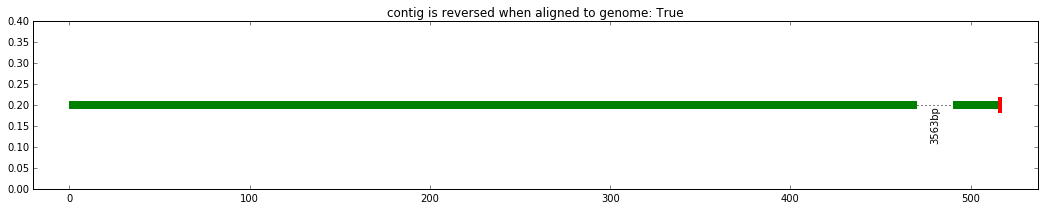

In [18]:
fig = plt.figure(figsize=(18, 3))
ax = fig.add_subplot(111)

cx = 0   # current x  
cy = 0.2 # current y, the center of a patch, not the bottom
contig_height = read_height = 0.05
# hdelta = 0
# vdelta = 0.01

# plot the contig aligned to the genome
total_span = contig.reference_end - contig.reference_start
for k, (key, raw_span) in enumerate(contig.cigartuples):
    print((key, span))
    if key == S.BAM_CREF_SKIP:
        span = total_span * 0.005   # arbitraily set to one tens
    else:
        span = raw_span

    if key in [S.BAM_CMATCH, S.BAM_CSOFT_CLIP]:
        width = span
        height = cigar_events_height_dd[key]
        x = cx
        y = cy - height * 0.5
        fc = cigar_events_color_dd[key]
        patch = patches.Rectangle((x, y), width, height, facecolor=fc, edgecolor='none')
        ax.add_patch(patch)
    elif key in [S.BAM_CREF_SKIP]:     
        xs = [cx, cx + span]
        ys = [cy, cy]
        color = cigar_events_color_dd[key]
        ax.plot(xs, ys, ':', color=color)
        ax.text(cx + span * 0.5, cy, f'{raw_span}bp', va='top', ha='center', rotation=90)
    else:
        raise ValueError(f'TODO implement handle {key}')
    cx += span

# plot the reads aligned
for read in r2c_bam.fetch(contig=contig.query_name):
    break

ax.set_title(f'contig is reversed when aligned to genome: {contig.is_reverse}')

ax.set_xlim(0 - 20, cx + 20)
ax.set_ylim(0, 0.4)